<a href="https://colab.research.google.com/github/debastiti/PUCRIO-MPV-Analise-de-dados/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP Análise de Dados e Boas Práticas

Nome: Tiago Matte Debastiani

Matrícula: 4052025000853

Dataset: [Top Hits Spotify from 2000-2019](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019)

# Descrição do Problema

Este conjunto de dados contém diversas estatísticas das top hits 2000 músicas do Spotify em um período de 2000 até 2019. O objetivo principal é classificar as musicas top hits com base em 8 características:
- Artista
- Nome da música
- Duração da música
- Popularidade
- Energia
- Dançabilidade (o quão dançável é uma musica)
- Positividade da musica

## Hipóteses do Problema
As hipóteses que defini foram:
- Quais artistas possuem mais musicas no top hits?
- Quais palavras aparecem mais nos nomes das musicas?
- A duração das músicas que ficam no top hits estão diminuindo com o tempo?
- A popularidade tem influência para a música entrar no top hits? Quais são as musicas mais populares?
- Existe uma correlação entre dançabilidade, energia e positividade?

## Tipo de Problema
Este é um problema de classificação supervisionada, pois com base em um conjunto de características (duração, popularidade, energia, dançabilidade) a ideia é criar um modelo de previsão de gênero, onde ele dirá, de acordo com estas características, qual o provável gênero de uma música.

## Seleção de Dados
Este dataset está disponível através do repositório Kaggle (plataforma de ciência de dados) e comumente utilizado para exercícios de análises exploratórias e visualização de dados. A escolha do dataset foi com o intuito de comprovar uma [reportagem](https://www.economist.com/culture/2025/06/02/hit-songs-are-getting-shorter) onde afirmava que as músicas top 1 da billboard estavam ficando cada vez mais curtas, portanto ter a característica duração da música era obrigatório.

## Atributos do Dataset
O dataset inicial contém 2000 músicas e 18 atributos relacionados a cada música, são estes atributos:
- **artist** (nome do artista)
- **song** (nome da música)
- **duration_ms** (duração da música em milisegundos)
- **explicit** (se a letra da música contém um ou mais critérios que são considerados ofensivos ou não apropriado para crianças)
- **year** (ano que música foi lançada)
- **popularity** (quanto mais alto o valor, mais popular é a música)
- **danceability** (descreve o quão apropriada é uma música para se dançar baseada em uma combinação de elementos musicais, incluindo o tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0.0 indica uma música menos dançável e 1.0 indica a mais dançável)
- **energy** (medida de 0.0 a 1.0 que representa a intensidade e a atividade percebida da música)
- **key** (indica o tom em que a faixa está. Os números inteiros correspondem a notas musicais usando a notação padrão de Classe de Altura. Por exemplo, 0 = Dó (C), 1 = Dó♯/Ré♭ (C♯/D♭), 2 = Ré (D), e assim por diante. Se nenhum tom for detectado, o valor será -1)
- **loudness** (volume geral de uma faixa, medido em decibéis (dB))
- **mode** (indica a modalidade (maior ou menor) de uma faixa, ou seja, o tipo de escala do qual seu conteúdo melódico é derivado. Modo maior é representado por 1 e modo menor por 0)
- **speechiness** (detecta a presença de palavras faladas em uma faixa. Quanto mais a gravação se assemelha exclusivamente à fala (por exemplo, talk show, audiolivro, poesia), mais próximo de 1.0 será o valor. Valores acima de 0.66 indicam faixas provavelmente compostas inteiramente por fala. Valores entre 0.33 e 0.66 indicam faixas que podem conter fala e música, seja em seções distintas ou sobrepostas (como em músicas de rap). Valores abaixo de 0.33 representam, na maioria dos casos, músicas ou faixas sem características de fala)
- **acousticness** (medida de confiança, de 0.0 a 1.0, que indica se a faixa é acústica. Um valor de 1.0 representa alta confiança de que a faixa é totalmente acústica)
- **instrumentalness** (prediz se uma faixa não contém vocais. Sons como "ooh" e "aah" são tratados como instrumentais nesse contexto. Faixas com rap ou fala são claramente vocais. Quanto mais próximo de 1.0 for o valor, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0.5 indicam faixas instrumentais, com maior confiança quanto mais próximo de 1.0)
- **liveness** (detecta a presença de público na gravação. Valores altos de vivacidade representam uma maior probabilidade de que a faixa tenha sido executada ao vivo. Um valor acima de 0.8 indica forte probabilidade de a faixa ser uma performance ao vivo)
- **valence** (medida de 0.0 a 1.0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, felizes, alegres, eufóricas), enquanto faixas com baixa valência soam mais negativas (por exemplo, tristes, deprimidas, zangadas))
- **tempo** (estimativa geral da velocidade da faixa em batidas por minuto (BPM))
- **genre** (gênero musical da faixa)

# Importação das Bibliotecas Necessárias e Carga de Dados
Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Top Hits Spotify from 2000-2019.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from wordcloud import WordCloud
import re
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [86]:
# Carregamento do dataset armazenado no github e armazenamento em um dataframe
url = 'https://raw.githubusercontent.com/debastiti/PUCRIO-MPV-Analise-de-dados/refs/heads/main/songs_spotify.csv'
df = pd.read_csv(url)

In [87]:
# Primeiras linhas do df
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


# Análise e Tratamento de Dados
Nesta etapa serão feitas análises para verificar o estado dos dados e caso necessário, seu devido tratamento para que o dataframe fique o mais confiável possível.

In [88]:
# Renomear colunas para melhor entendimento
df.rename(columns={'artist':'artista', 'song':'musica', 'duration_ms':'duracao_ms', 'explicit':'explicita', 'year':'ano',
        'popularity':'popularidade', 'danceability':'dancabilidade', 'energy':'energia', 'key':'tom', 'loudness':'volume',
        'mode':'tipo_escala', 'speechiness':'presenca_de_fala', 'acousticness':'grau_de_acustica', 'instrumentalness':'instrumentalidade',
        'liveness':'p_aovivo', 'valence':'positividade', 'tempo':'bpm','genre':'genero'}
        ,inplace=True)

In [89]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:\n")
print(df.info())

Total de instâncias: 2000

Tipos de dados por coluna:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   artista            2000 non-null   object 
 1   musica             2000 non-null   object 
 2   duracao_ms         2000 non-null   int64  
 3   explicita          2000 non-null   bool   
 4   ano                2000 non-null   int64  
 5   popularidade       2000 non-null   int64  
 6   dancabilidade      2000 non-null   float64
 7   energia            2000 non-null   float64
 8   tom                2000 non-null   int64  
 9   volume             2000 non-null   float64
 10  tipo_escala        2000 non-null   int64  
 11  presenca_de_fala   2000 non-null   float64
 12  grau_de_acustica   2000 non-null   float64
 13  instrumentalidade  2000 non-null   float64
 14  p_aovivo           2000 non-null   float64
 15  positividade     

In [90]:
# Verificar se existe algum dado nulo
df.isnull().sum()

,0
artista,0
musica,0
duracao_ms,0
explicita,0
ano,0
popularidade,0
dancabilidade,0
energia,0
tom,0
volume,0


Não existe nenhum dado nulo no dataset.

In [91]:
# Verificar se existe algum dado duplicado
df.duplicated().value_counts()

,count
False,1941
True,59


Existem 59 registros duplicados que serão tratados a seguir.

In [92]:
# Visualizar linhas duplicadas, contando quantas vezes cada linha aparece (pode ser visualizado na ultima coluna da direita)
df[df.duplicated(keep=False)].value_counts()

artista                   musica                                       duracao_ms  explicita  ano   popularidade  dancabilidade  energia  tom  volume   tipo_escala  presenca_de_fala  grau_de_acustica  instrumentalidade  p_aovivo  positividade  bpm      genero                        
Ariana Grande             Love Me Harder                               236133      False      2014  74            0.472          0.714    1    -4.389   0            0.0334            0.009370          0.000000           0.0764    0.240         98.992   pop                               2
Baby Bash                 Suga Suga                                    239026      False      2003  73            0.662          0.748    5    -3.041   0            0.2680            0.688000          0.000008           0.0841    0.535         82.331   hip hop, pop, R&B, latin          2
Billie Eilish             lovely (with Khalid)                         200185      False      2018  86            0.351          0.296    4    -10.109  0            0.0333            0.934000          0.000000           0.0950    0.120         115.284  pop, Dance/Electronic             2
Bruno Mars                Locked out of Heaven                         233478      False      2012  85            0.726          0.698    5    -4.165   1            0.0431            0.049000          0.000000           0.3090    0.867         143.994  pop                               2
Bryson Tiller             Don't                                        198293      True       2015  78            0.765          0.356    11   -5.556   0            0.1950            0.223000          0.000000           0.0963    0.189         96.991   hip hop, pop, R&B                 2
Busta Rhymes              I Know What You Want (feat. Flipmode Squad)  324306      True       2002  68            0.648          0.759    6    -4.315   1            0.3060            0.014200          0.000000           0.6480    0.518         85.996   hip hop, pop                      2
Chris Brown               Kiss Kiss (feat. T-Pain)                     250666      False      2007  68            0.729          0.658    10   -3.386   0            0.2250            0.050600          0.000000           0.0693    0.551         140.043  hip hop, pop, R&B                 2
Coldplay                  Clocks                                       307879      False      2002  79            0.577          0.749    5    -7.215   0            0.0279            0.599000          0.011500           0.1830    0.255         130.970  rock, pop                         2
                          Paradise                                     278719      False      2011  82            0.449          0.585    5    -6.761   1            0.0268            0.050900          0.000087           0.0833    0.212         139.631  rock, pop                         2
Craig David               Fill Me In                                   257200      False      2000  60            0.682          0.744    8    -6.981   1            0.0365            0.376000          0.009510           0.0600    0.827         132.493  hip hop, pop, R&B                 2
D4L                       Laffy Taffy                                  224253      True       2005  63            0.891          0.439    7    -7.994   0            0.4280            0.035100          0.000000           0.0932    0.622         77.499   hip hop, pop                      2
DJ Snake                  You Know You Like It                         247266      False      2014  69            0.407          0.725    5    -5.346   0            0.1880            0.014100          0.000002           0.3060    0.247         196.093  hip hop, pop, Dance/Electronic    2
Daniel Bedingfield        If You're Not The One                        257026      False      2002  58            0.688          0.538    10   -7.608   1            0.0292            0.504000          0.000000           0.1110    0.270         119.

In [93]:
# Excluir linhas duplicadas
df = df.drop_duplicates()

In [94]:
# Verificar se a quantidade duplicada foi excluída corretamente
df.duplicated().value_counts()

,count
False,1941


Não existe mais nenhum registro duplicado

In [95]:
# Estatísticas descritivas do dataset
df.describe()

,duracao_ms,ano,popularidade,dancabilidade,energia,tom,volume,tipo_escala,presenca_de_fala,grau_de_acustica,instrumentalidade,p_aovivo,positividade,bpm
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


Através da análise de estatísticas descritivas do dataset foi possível concluir que:
- O tempo médio das musicas é de 228594.97 ms (3min49s)
- A música mais antiga é de 1998 e a música mais recente é de 2020
- A escala de popularidade vai de 0 até 89 pontos
- A música menos dançável teve 0,129 pontos e a mais dançável teve 0,975 pontos

In [96]:
# Converter milissegundos para minutos
df.loc[:, 'duracao_min'] = df['duracao_ms'] / 60000

In [97]:
# Verificar como ficaram as estatísticas descritivas após converter a coluna
df['duracao_min'].describe()

,duracao_min
count,1941.000000
mean,3.809916
std,0.654163
min,1.883333
25%,3.391767
50%,3.719767
75%,4.132433
max,8.069100


In [98]:
# Remover colunas que não vão ser utilizadas
df = df.drop(columns=['duracao_ms','explicita','tom','volume','tipo_escala','presenca_de_fala','grau_de_acustica',
                      'instrumentalidade','p_aovivo','bpm'])

In [99]:
# Verificar como ficou o dataframe
df.head()

,artista,musica,ano,popularidade,dancabilidade,energia,positividade,genero,duracao_min
0,Britney Spears,Oops!...I Did It Again,2000,77,0.751,0.834,0.894,pop,3.519333
1,blink-182,All The Small Things,1999,79,0.434,0.897,0.684,"rock, pop",2.784433
2,Faith Hill,Breathe,1999,66,0.529,0.496,0.278,"pop, country",4.175767
3,Bon Jovi,It's My Life,2000,78,0.551,0.913,0.544,"rock, metal",3.741550
4,*NSYNC,Bye Bye Bye,2000,65,0.614,0.928,0.879,pop,3.342667


# Análises para a verificação e validação das hipóteses
Nesta etapa serão feitas as análises relacionadas a cada hipótese levantada no início do MVP.

## Quais artistas possuem mais músicas no top hits?

In [100]:
count_artista = df.groupby('artista',as_index=False).count().sort_values(by='musica',ascending=False)[["artista" ,"musica"]].head(10)

In [101]:
display(count_artista)

,artista,musica
219,Drake,23
628,Rihanna,23
239,Eminem,21
127,Calvin Harris,20
118,Britney Spears,19
196,David Guetta,18
90,Beyoncé,16
719,Taylor Swift,16
387,Kanye West,16
391,Katy Perry,16


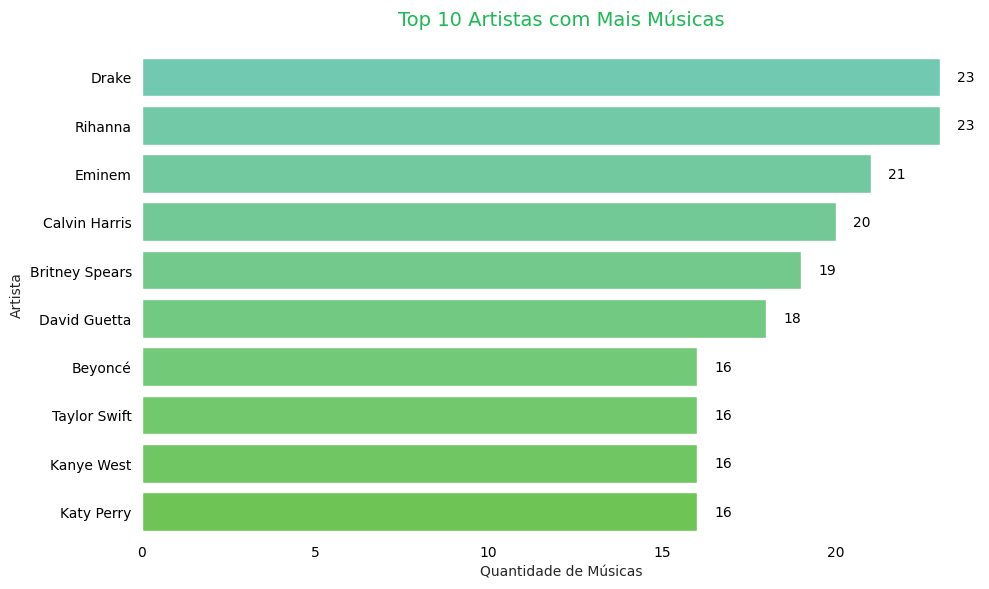

In [102]:
# Função para gerar variações do verde Spotify
def cores_spotify(base_color, n):
    return [mcolors.to_hex(mcolors.rgb_to_hsv(mcolors.to_rgb(base_color)) * [1, 1, 1 - i*0.07]) for i in range(n)]

verde_spotify = '#1DB954'
tons_verde = cores_spotify(verde_spotify, len(count_artista))

# Criação do gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=count_artista,
    x='musica',
    y='artista',
    hue='artista',
    palette=tons_verde,
    legend=False
)

# Adiciona rótulos de dados
for i, (musica, artista) in enumerate(zip(count_artista['musica'], count_artista['artista'])):
    plt.text(
        musica + 0.5,
        i,
        str(musica),
        va='center',
        ha='left',
        fontsize=10,
        color='black'
    )

# Mostrar o gráfico
plt.title('Top 10 Artistas com Mais Músicas', fontsize=14, color=verde_spotify, pad=20)
plt.xlabel('Quantidade de Músicas')
plt.ylabel('Artista')
plt.xticks(color='black')
plt.yticks(color='black')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Através do gráfico de barras é possíver verificar que Drake e Rihanna são os artistas com mais músicas no Top Hits, com 23 músicas cada.

## Quais palavras aparecem mais nos nomes das músicas?


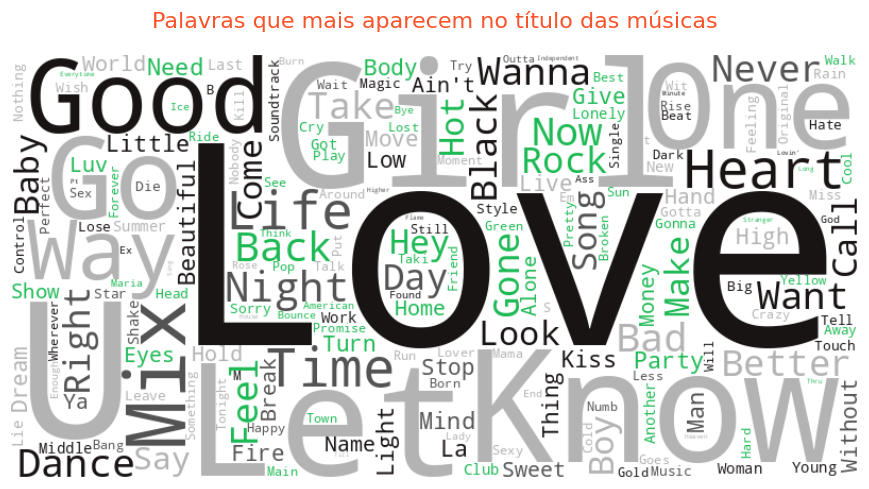

In [103]:
# Criação de uma variável que contenha todas as palavras de cada musica
palavras = " ".join(musica for musica in df.musica)
palavras = "".join(re.split(r"\(|\)|\[|\]", palavras)[::2])

# Remoção das palavras que aparecem e não necessariamente fazem parte do nome da música
palavras = palavras.replace('Edit ', '')
palavras = palavras.replace('Radio ', '')
palavras = palavras.replace('Remix', '')
palavras = palavras.replace('Version', '')

# Paleta completa do Spotify
cores_spotify = ['#1DB954', '#191414', '#535353', '#B3B3B3']

# Função para aplicar cores aleatórias da paleta do spotify
def paleta_spotify(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(cores_spotify)

# Geração da nuvem com a paleta Spotify
nuvem_palavras = WordCloud(
    collocations=False,
    background_color='white',
    color_func=paleta_spotify,
    width=800,
    height=400
).generate(palavras)

# Mostrar o gráfico
plt.figure(figsize=(10, 5))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.title('Palavras que mais aparecem no título das músicas', fontsize=16, color='#fb542b', pad=20)
plt.axis("off")
plt.tight_layout()
plt.show()

Pode-se concluir através do gráfico de nuvem de palavras que a palavra **Love** é a mais utilizada no nome das músicas

## A duração das músicas que ficam no top hits estão diminuindo com o tempo?


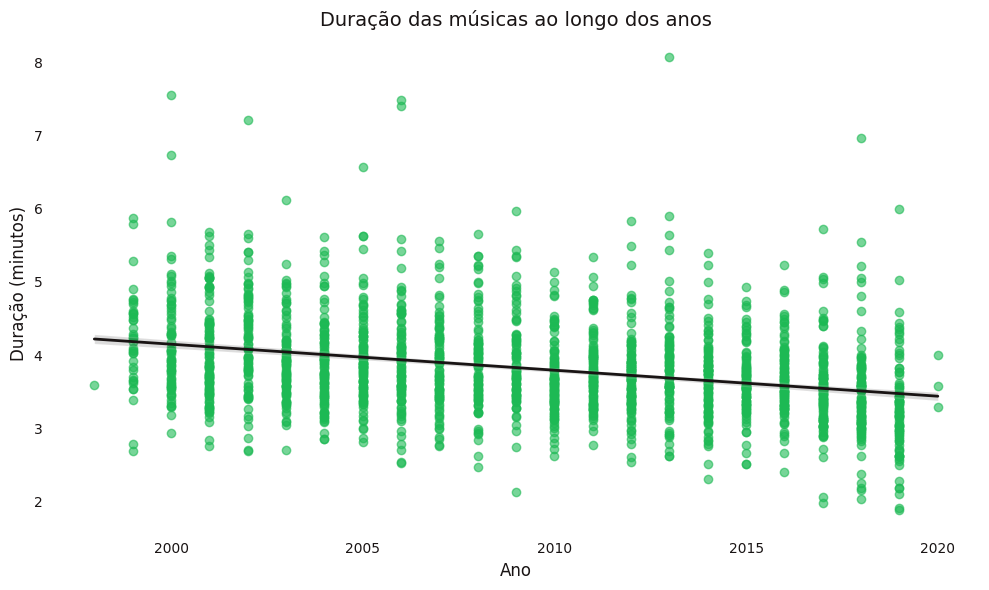

In [104]:
# Remove o estilo de grade de fundo
sns.set_style("white")

# Define as cores do Spotify
verde_spotify = "#1DB954"
preto_spotify = "#191414"

# Cria o scatterplot com linha de tendência reta (regressão linear)
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='ano',
    y='duracao_min',
    scatter_kws={'color': verde_spotify, 'alpha': 0.6},
    line_kws={'color': preto_spotify, 'linewidth': 2}
)

# Personaliza o fundo
plt.gca().set_facecolor("white")
plt.grid(False)
plt.box(False)

# Títulos e rótulos com cores personalizadas
plt.title('Duração das músicas ao longo dos anos', fontsize=14, color=preto_spotify)
plt.xlabel('Ano', fontsize=12, color=preto_spotify)
plt.ylabel('Duração (minutos)', fontsize=12, color=preto_spotify)
plt.xticks(color=preto_spotify)
plt.yticks(color=preto_spotify)

# Fundo da figura
plt.gcf().patch.set_facecolor('white')

# Mostra o gráfico
plt.tight_layout()
plt.show()

Neste gráfico de scatterplot da para ver com o auxílio da linha de tendência que de fato a duração das músicas que vão para o Top Hits está diminuindo com o passar do tempo. Para deixar mais evidente este ponto, a seguir será feito uma comparação com a média do tempo das músicas nos anos.

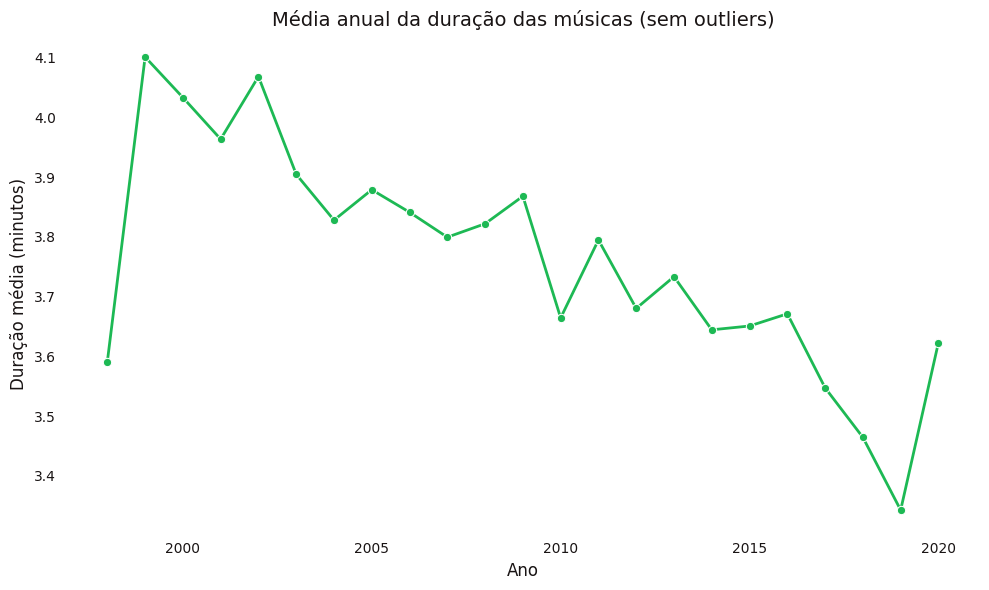

In [105]:
# Define as cores do Spotify
verde_spotify = "#1DB954"
preto_spotify = "#191414"

# Calcula média e desvio padrão geral da duração
media = df['duracao_min'].mean()
desvio = df['duracao_min'].std()

# Filtra para manter só os valores dentro de 2 desvios padrão
df_filtrado = df[(df['duracao_min'] >= media - 2 * desvio) & (df['duracao_min'] <= media + 2 * desvio)]

# Calcula a média anual com os dados filtrados
media_anual = df_filtrado.groupby('ano')['duracao_min'].mean().reset_index()

# Estilo do gráfico limpo
sns.set_style("white")

# Gráfico da média anual
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=media_anual,
    x='ano',
    y='duracao_min',
    marker='o',
    color=verde_spotify,
    linewidth=2
)

# Personaliza o fundo e grades
plt.gca().set_facecolor("white")
plt.grid(False)
plt.box(False)

# Títulos e rótulos com cores personalizadas
plt.title('Média anual da duração das músicas (sem outliers)', fontsize=14, color=preto_spotify)
plt.xlabel('Ano', fontsize=12, color=preto_spotify)
plt.ylabel('Duração média (minutos)', fontsize=12, color=preto_spotify)
plt.xticks(color=preto_spotify)
plt.yticks(color=preto_spotify)

# Fundo da figura
plt.gcf().patch.set_facecolor('white')

plt.tight_layout()
plt.show()

Neste gráfico de linhas da para ver claramente que a média dos tempos das músicas está diminuindo com o passar do tempo.

## A popularidade tem influência para a música entrar no top hits? Quais são as musicas mais populares?


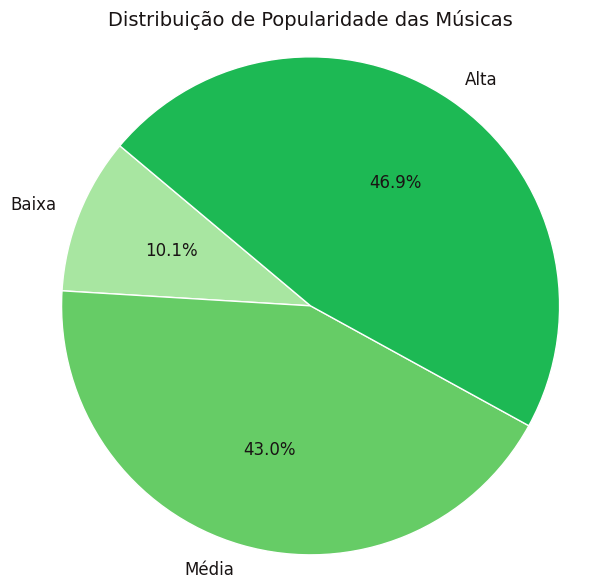

In [106]:
# Definir os limites das categorias
bins = [0, 33, 66, 100]
labels = ['Baixa', 'Média', 'Alta']

# Criar nova coluna com a classificação
df['faixa_popularidade'] = pd.cut(df['popularidade'], bins=bins, labels=labels, include_lowest=True)

# Contagem por categoria
contagem = df['faixa_popularidade'].value_counts().sort_index()

# Cores em tons de verde
cores = ['#A8E6A1', '#66CC66', '#1DB954']

# Plotar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(
    contagem,
    labels=contagem.index,
    colors=cores,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'color': '#191414', 'fontsize': 12}
)

plt.title('Distribuição de Popularidade das Músicas', color='#191414', fontsize=14)
plt.axis('equal')  # Para deixar a pizza circular
plt.tight_layout()
plt.show()

Com este gráfico de pizza está claro que a popularidade tem uma forte influência e pode ser considerada significativa para a entrada de uma música no Top Hits.

In [107]:
# Ordenar pela popularidade e pegar os 5 primeiros
top5 = df.sort_values(by='popularidade', ascending=False).head(5)

# Mostrar apenas as colunas desejadas
print("Top 5 músicas mais populares:")
display(top5[['artista', 'musica', 'popularidade']])

Top 5 músicas mais populares:


,artista,musica,popularidade
1322,The Neighbourhood,Sweater Weather,89
1311,Tom Odell,Another Love,88
201,Eminem,Without Me,87
1613,WILLOW,Wait a Minute!,86
1819,Billie Eilish,lovely (with Khalid),86


A música mais popular do dataset é a Swether Weather do The Neighbourhood

##Existe uma correlação entre dançabilidade, energia e positividade?


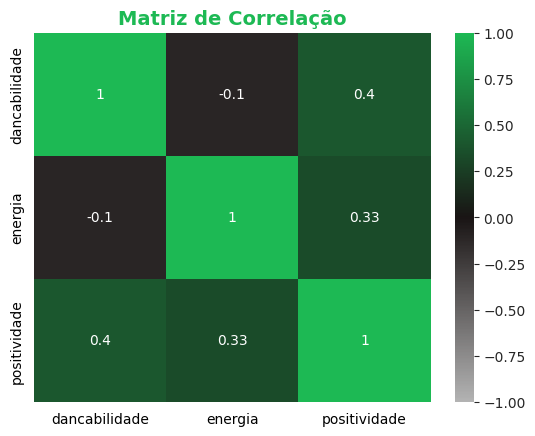

In [108]:
# cores spotify
cinza_spotify = '#B3B3B3'
preto_spotify = "#191414"
verde_spotify = "#1DB954"

cmap_custom = LinearSegmentedColormap.from_list("preto_cinza_verde", [cinza_spotify, preto_spotify, verde_spotify])

# Calcula a correlação
correlacao = df[['dancabilidade', 'energia', 'positividade']].corr()

sns.heatmap(
    correlacao,
    annot=True,
    cmap=cmap_custom,
    vmin=-1,
    vmax=1,
    linewidths=0,
    linecolor=None
)

plt.title("Matriz de Correlação", fontsize=14, fontweight='bold', color=verde_spotify)
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

Através do gráfico de heatmap, podemos concluir que:
- Existe uma ligação positiva entre positividade e as outras duas variáveis, especialmente com dançabilidade.
- Energia e dançabilidade não estão relacionadas diretamente; ou seja, uma música dançante não é necessariamente energética (e vice-versa).
- Nenhuma das correlações é forte (acima de 0.7 ou abaixo de -0.7), então são associações leves ou moderadas, não determinísticas.



# Pré-Processamento de Dados

In [109]:
# print dos dados unicos da coluna genero do df
u = df['genero'].unique()
print(u)

['pop' 'rock, pop' 'pop, country' 'rock, metal' 'hip hop, pop, R&B'
 'hip hop' 'pop, rock' 'pop, R&B' 'Dance/Electronic'
 'pop, Dance/Electronic' 'rock, Folk/Acoustic, easy listening' 'metal'
 'hip hop, pop' 'R&B' 'pop, latin' 'Folk/Acoustic, rock'
 'pop, easy listening, Dance/Electronic' 'rock' 'rock, blues, latin'
 'pop, rock, metal' 'rock, pop, metal' 'hip hop, R&B' 'pop, Folk/Acoustic'
 'set()' 'hip hop, pop, latin' 'hip hop, Dance/Electronic'
 'hip hop, pop, rock' 'World/Traditional, Folk/Acoustic'
 'Folk/Acoustic, pop' 'rock, easy listening' 'World/Traditional, hip hop'
 'hip hop, pop, R&B, latin' 'rock, blues' 'rock, R&B, Folk/Acoustic, pop'
 'latin' 'pop, R&B, Dance/Electronic' 'World/Traditional, rock'
 'pop, rock, Dance/Electronic' 'pop, easy listening, jazz'
 'rock, Dance/Electronic' 'World/Traditional, pop, Folk/Acoustic'
 'country' 'hip hop, pop, Dance/Electronic' 'hip hop, pop, country'
 'World/Traditional, rock, pop' 'World/Traditional, pop'
 'hip hop, pop, R&B, Dance/El

In [110]:
# Substituir ", " por "/" para melhor organização dos dados
df['genero'] = df['genero'].str.replace(', ', '/', regex=False)

In [111]:
u = df['genero'].unique()
print(u)

['pop' 'rock/pop' 'pop/country' 'rock/metal' 'hip hop/pop/R&B' 'hip hop'
 'pop/rock' 'pop/R&B' 'Dance/Electronic' 'pop/Dance/Electronic'
 'rock/Folk/Acoustic/easy listening' 'metal' 'hip hop/pop' 'R&B'
 'pop/latin' 'Folk/Acoustic/rock' 'pop/easy listening/Dance/Electronic'
 'rock' 'rock/blues/latin' 'pop/rock/metal' 'rock/pop/metal' 'hip hop/R&B'
 'pop/Folk/Acoustic' 'set()' 'hip hop/pop/latin'
 'hip hop/Dance/Electronic' 'hip hop/pop/rock'
 'World/Traditional/Folk/Acoustic' 'Folk/Acoustic/pop'
 'rock/easy listening' 'World/Traditional/hip hop' 'hip hop/pop/R&B/latin'
 'rock/blues' 'rock/R&B/Folk/Acoustic/pop' 'latin'
 'pop/R&B/Dance/Electronic' 'World/Traditional/rock'
 'pop/rock/Dance/Electronic' 'pop/easy listening/jazz'
 'rock/Dance/Electronic' 'World/Traditional/pop/Folk/Acoustic' 'country'
 'hip hop/pop/Dance/Electronic' 'hip hop/pop/country'
 'World/Traditional/rock/pop' 'World/Traditional/pop'
 'hip hop/pop/R&B/Dance/Electronic' 'pop/R&B/easy listening'
 'rock/pop/Dance/Electro

Nestes dados distintos gerados na célula anterior, constatou-se dois gêneros que não são gêneros, abaixo um print das quantidades de linhas com esses gêneros para entender se a quantidade de linhas classificadas com esses generos é significativa.

In [112]:
print('Quantidade de itens com gênero "set()":',len(df[df['genero'] == 'set()']))
print('Quantidade de itens com gênero "easy listening":',len(df[df['genero'] == 'easy listening']))

Quantidade de itens com gênero "set()": 22
Quantidade de itens com gênero "easy listening": 1


Visto que esta quantidade não é significativa, estes itens serão removidos do df para não interferirem na hora de rodar o modelo de previsão de gênero.

In [113]:
# Remoção das linhas com "set()" e "easy listening"
df = df[df['genero'] != 'set()']
df = df[df['genero'] != 'easy listening']

Com o intuito de simplificar a granularidade dos gêneros, para as músicas que são classificadas com mais de um gênero, será utilizado apenas o primeiro gênero.

In [114]:
# criação do gênero simplificado, pegando apenas o primeiro caso haja a divisória "/" entre os gêneros
df['genero_simplificado'] = df['genero'].apply(lambda x: x.split('/')[0] if '/' in x else x)

In [115]:
# Verificação da coluna gênero_simplificado
display(df)

,artista,musica,ano,popularidade,dancabilidade,energia,positividade,genero,duracao_min,faixa_popularidade,genero_simplificado
0,Britney Spears,Oops!...I Did It Again,2000,77,0.751,0.834,0.894,pop,3.519333,Alta,pop
1,blink-182,All The Small Things,1999,79,0.434,0.897,0.684,rock/pop,2.784433,Alta,rock
2,Faith Hill,Breathe,1999,66,0.529,0.496,0.278,pop/country,4.175767,Média,pop
3,Bon Jovi,It's My Life,2000,78,0.551,0.913,0.544,rock/metal,3.741550,Alta,rock
4,*NSYNC,Bye Bye Bye,2000,65,0.614,0.928,0.879,pop,3.342667,Média,pop
...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,2019,79,0.842,0.734,0.952,pop,3.017100,Alta,pop
1996,Taylor Swift,Cruel Summer,2019,78,0.552,0.702,0.564,pop,2.973767,Alta,pop
1997,Blanco Brown,The Git Up,2019,69,0.847,0.678,0.811,hip hop/country,3.343217,Alta,hip hop
1998,Sam Smith,Dancing With A Stranger (with Normani),2019,75,0.741,0.520,0.347,pop,2.850483,Alta,pop


In [116]:
# Separar features (X) e target (y)
X = df.drop(['artista','musica','ano','genero','faixa_popularidade','genero_simplificado'], axis=1)
y = df['genero_simplificado']

In [117]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [118]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (1342, 5)
Dimensões de X_test: (576, 5)
Dimensões de y_train: (1342,)
Dimensões de y_test: (576,)


In [119]:
# Verificar a necessidade de normalizar as colunas que serão utilizadas no modelo
display(X_train)

,popularidade,dancabilidade,energia,positividade,duracao_min
1862,73,0.922,0.581,0.595,3.021050
73,59,0.655,0.791,0.862,3.913767
1045,0,0.845,0.601,0.329,4.033550
102,83,0.780,0.768,0.507,6.735100
1905,84,0.658,0.671,0.166,3.368217
...,...,...,...,...,...
301,74,0.735,0.824,0.726,3.527767
1610,82,0.491,0.693,0.412,4.304433
1845,72,0.747,0.834,0.687,3.595983
1150,75,0.735,0.766,0.600,3.587100


## Normalização
Será feita a normalização pois é possível notar que as colunas popularidade e duracao_min não estão em um intervalo de 0 a 1

In [120]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [121]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [122]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [123]:
# Verificar se as colunas foram normalizadas
display(df_normalized)

,popularidade,dancabilidade,energia,positividade,duracao_min
0,0.820225,0.942925,0.555744,0.595679,0.179741
1,0.662921,0.625446,0.778935,0.881271,0.324799
2,0.000000,0.851367,0.577001,0.311156,0.344263
3,0.932584,0.774078,0.754490,0.501551,0.783238
4,0.943820,0.629013,0.651398,0.136806,0.236152
...,...,...,...,...,...
1337,0.831461,0.720571,0.814008,0.735801,0.262078
1338,0.921348,0.430440,0.674779,0.399936,0.388278
1339,0.808989,0.734839,0.824636,0.694085,0.273162
1340,0.842697,0.720571,0.752365,0.601027,0.271719


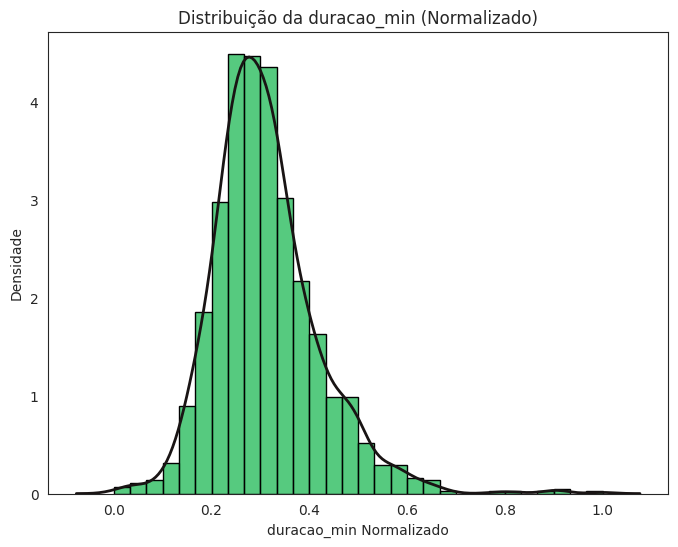

In [124]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))

# Histograma com barras verdes (Spotify)
sns.histplot(
    df_normalized['duracao_min'],
    stat='density',  # importante para combinar com a KDE
    color='#1DB954',  # Verde Spotify
    bins=30,
    edgecolor='black'
)

# Linha KDE separada com preto Spotify
sns.kdeplot(
    df_normalized['duracao_min'],
    color='#191414',  # Preto Spotify
    linewidth=2
)

plt.title('Distribuição da duracao_min (Normalizado)')
plt.xlabel('duracao_min Normalizado')
plt.ylabel('Densidade')
plt.show()

Através do histograma é possível validar que a variável foi normalizada, está no intervalo entre 0 e 1 e está pronta para ser utilizada no modelo.

# Conclusão
Ao longo deste projeto, foi feita uma análise aprofundada do dataset "Top Hits Spotify from 2000–2019", com o objetivo de identificar padrões e tendências nas músicas de maior sucesso no Spotify ao longo de duas décadas. Através da exploração dos dados, foi possível responder as seguintes hipóteses:

- Quais artistas possuem mais musicas no top hits?
  - Drake e Rihanna
- Quais palavras aparecem mais nos nomes das musicas?
 - Love é a palavra que mais aparece no nome das músicas
- A duração das músicas que ficam no top hits estão diminuindo com o tempo?
 - Sim, é possível enxergar claramente uma tendência de queda na duração das músicas com o passar do tempo
- A popularidade tem influência para a música entrar no top hits? Quais são as musicas mais populares?
 - Sim, a maioria das músicas no top hits são musicas com popularidade alta.
- Existe uma correlação entre dançabilidade, energia e positividade?
  - Existe, porém não é uma correlação que pode ser considerada forte.

Os resultados obtidos corroboram a hipótese de que as músicas de sucesso estão ficando mais curtas, acompanhando tendências de consumo mais rápido e dinâmico. Por fim, este estudo demonstrou a importância da análise de dados como ferramenta de compreensão de fenômenos culturais, reforçando boas práticas em todo o processo — desde a aquisição e tratamento dos dados até a visualização e interpretação dos resultados.